### Importações

In [2]:
# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
# from skimage.io import imread
import matplotlib.pyplot as plt

# for creating validation set
# from sklearn.model_selection import train_test_split

# for evaluating the model
# from sklearn.metrics import accuracy_score
# from tqdm import tqdm

# PyTorch libraries and modules
# import torch
# from torch.autograd import Variable
# from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
# from torch.optim import Adam, SGD

### Carregamento dos Dados

In [37]:
data = pd.read_csv('thyroid-dataset.csv')
# print(data['target'].unique())
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


### Histograma de Idade dos Pacientes

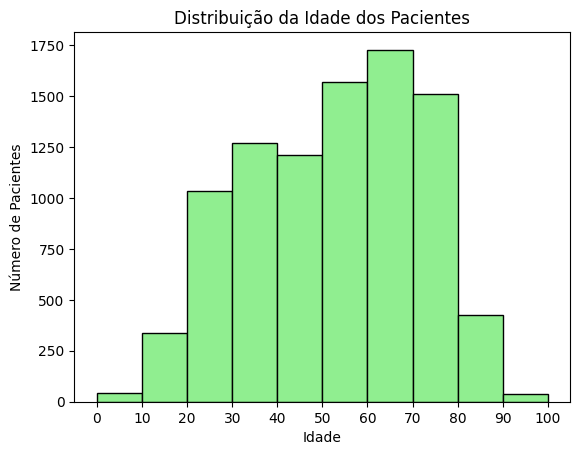

In [38]:
# print(data['age'].unique())
breaks = range(0, 101, 10)
plt.hist(data['age'], bins=breaks, color='lightgreen', edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Número de Pacientes')
plt.title('Distribuição da Idade dos Pacientes')
plt.xticks(breaks)
plt.show()

### Gráfico de Barras para Sexo dos Pacientes

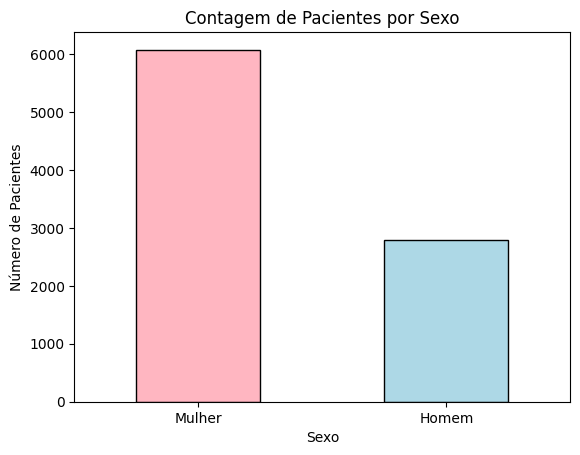

In [39]:
# print(data['sex'].unique())
sex_counts = data['sex'].value_counts()
sex_labels = ['Mulher', 'Homem']
sex_counts.plot(kind='bar', color=['lightpink', 'lightblue'], edgecolor='black')
plt.xlabel('Sexo')
plt.ylabel('Número de Pacientes')
plt.title('Contagem de Pacientes por Sexo')
plt.xticks(range(len(sex_labels)), sex_labels, rotation=0)
plt.show()

### Gráficos para Diagnósticos

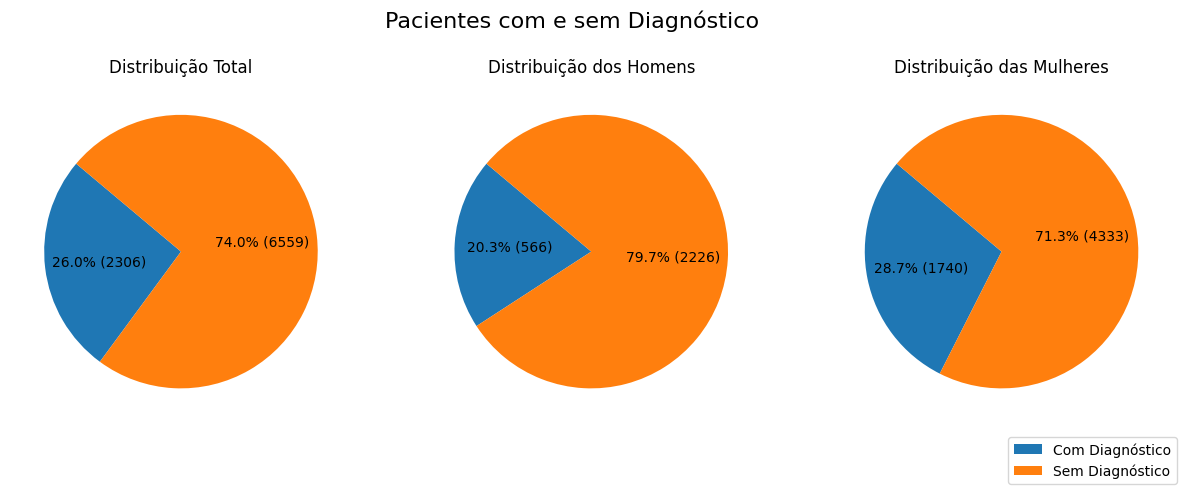

In [40]:
total_with_diagnosis = ((data['target'] != '-') & data['sex'].notna()).sum()
total_without_diagnosis = ((data['target'] == '-') & data['sex'].notna()).sum()

male_with_diagnosis = ((data['target'] != '-') & (data['sex'] == 'M')).sum()
male_without_diagnosis = ((data['target'] == '-') & (data['sex'] == 'M')).sum()

female_with_diagnosis = ((data['target'] != '-') & (data['sex'] == 'F')).sum()
female_without_diagnosis = ((data['target'] == '-') & (data['sex'] == 'F')).sum()

labels_gender = ['Homens', 'Mulheres']

sizes_total = [total_with_diagnosis, total_without_diagnosis]
sizes_male = [male_with_diagnosis, male_without_diagnosis]
sizes_female = [female_with_diagnosis, female_without_diagnosis]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].pie(sizes_total, autopct=lambda p: f'{p:.1f}% ({sizes_total[int(p/100 * len(sizes_total))]:d})', startangle=140)
axs[0].set_title('Distribuição Total')

axs[1].pie(sizes_male, autopct=lambda p: f'{p:.1f}% ({sizes_male[int(p/100 * len(sizes_male))]:d})', startangle=140)
axs[1].set_title('Distribuição dos Homens')

axs[2].pie(sizes_female, autopct=lambda p: f'{p:.1f}% ({sizes_female[int(p/100 * len(sizes_female))]:d})', startangle=140)
axs[2].set_title('Distribuição das Mulheres')

legend_labels = ['Com Diagnóstico', 'Sem Diagnóstico']
plt.legend(legend_labels, loc='lower left', bbox_to_anchor=(0.5, -0.2))
plt.suptitle('Pacientes com e sem Diagnóstico', fontsize=16)
plt.show()

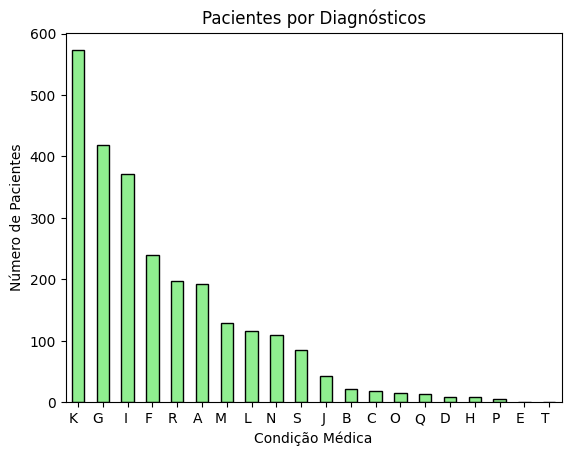

In [41]:
def count_letters(diagnosis):
    count = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0,
             'I': 0, 'J': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'O': 0, 'P': 0,
             'Q': 0, 'R': 0, 'S': 0, 'T': 0}

    if pd.isna(diagnosis):
        return count

    for letter in diagnosis:
        if letter in count:
            count[letter] += 1
        elif '|' in letter:
            letters = letter.split('|')
            for l in letters:
                if l in count:
                    count[l] += 1

    return count

total_count = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0,
               'I': 0, 'J': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'O': 0, 'P': 0,
               'Q': 0, 'R': 0, 'S': 0, 'T': 0}

results = data['target'].apply(count_letters)

for result in results:
    total_count = {letter: total_count[letter] + result.get(letter, 0) for letter in total_count}

df_total_count = pd.DataFrame.from_dict(total_count, orient='index', columns=['Count'])

df_total_count = df_total_count.sort_values(by='Count', ascending=False)

df_total_count.plot(kind='bar', color='lightgreen', edgecolor='black', legend=False)
plt.xlabel('Condição Médica')
plt.ylabel('Número de Pacientes')
plt.title('Pacientes por Diagnósticos')
plt.xticks(rotation=0, ha='right')
plt.show()

### Gráficos Hipertireoidismo e Hipotireoidismo

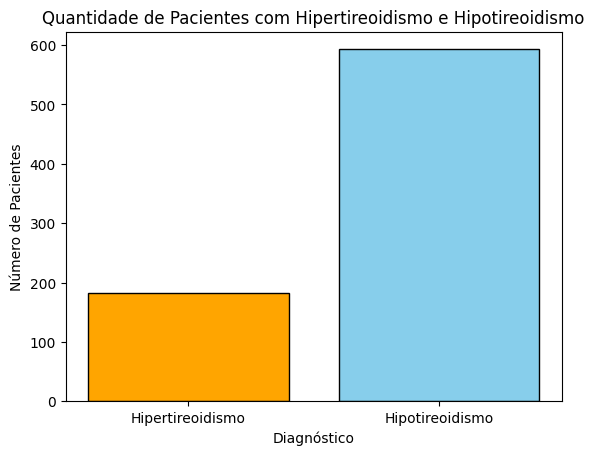

In [64]:
hipertireoidismo_count = 0
hipotireoidismo_count = 0

for target in data['target']:
    if target in ['A', 'B', 'C', 'D']:
        hipertireoidismo_count += 1
    elif target in ['E', 'F', 'G', 'H']:
        hipotireoidismo_count += 1

# print("Hipertireoidismo:", hipertireoidismo_count)
# print("Hipotireoidismo:", hipotireoidismo_count)

labels = ['Hipertireoidismo', 'Hipotireoidismo']
quantidades = [hipertireoidismo_count, hipotireoidismo_count]

plt.bar(labels, quantidades, color=['orange', 'skyblue'], edgecolor='black')
plt.xlabel('Diagnóstico')
plt.ylabel('Número de Pacientes')
plt.title('Quantidade de Pacientes com Hipertireoidismo e Hipotireoidismo')
plt.show()

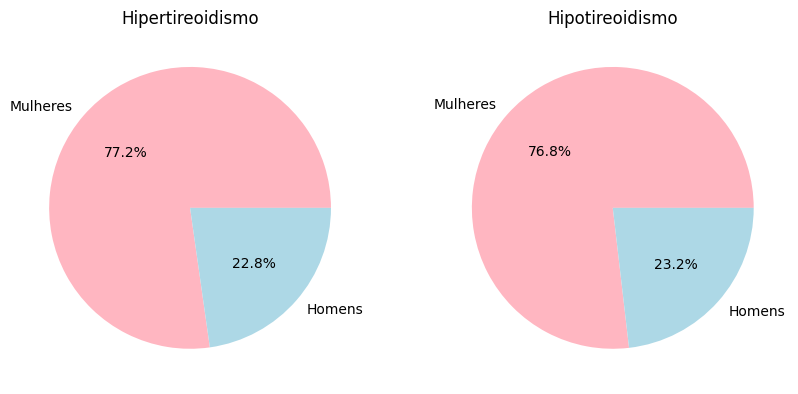

In [67]:
def map_sex_label(sex):
    if sex == 'F':
        return 'Mulheres'
    elif sex == 'M':
        return 'Homens'

hipertireoidismo_data = data[data['target'].isin(['A', 'B', 'C', 'D'])]
hipertireoidismo_sex = hipertireoidismo_data['sex'].value_counts()

hipotireoidismo_data = data[data['target'].isin(['E', 'F', 'G', 'H'])]
hipotireoidismo_sex = hipotireoidismo_data['sex'].value_counts()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(hipertireoidismo_sex.values, labels=hipertireoidismo_sex.index.map(map_sex_label), autopct='%1.1f%%', colors=['lightpink', 'lightblue'])
plt.title('Hipertireoidismo')

plt.subplot(1, 2, 2)
plt.pie(hipotireoidismo_sex.values, labels=hipotireoidismo_sex.index.map(map_sex_label), autopct='%1.1f%%', colors=['lightpink', 'lightblue'])
plt.title('Hipotireoidismo')

plt.show()

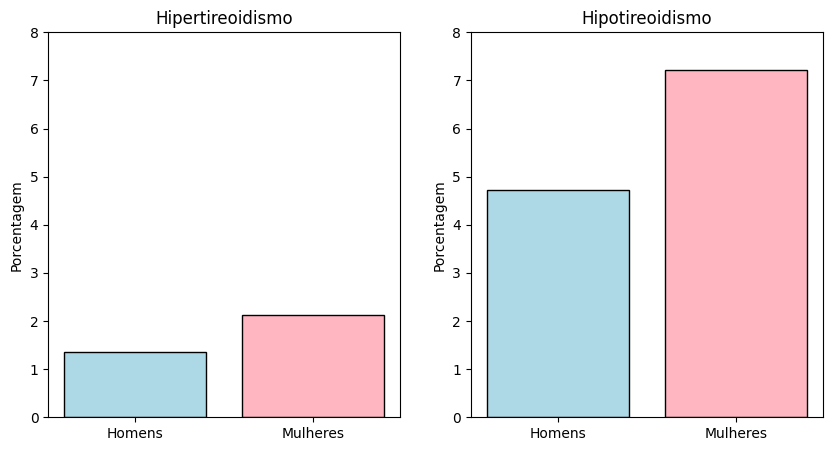

In [75]:
total_homens = (data['sex'] == 'M').sum()
total_mulheres = (data['sex'] == 'F').sum()

hipertireoidismo_data = data[data['target'].isin(['A', 'B', 'C', 'D'])]
hipotireoidismo_data = data[data['target'].isin(['E', 'F', 'G', 'H'])]

homens_hipertireoidismo = (hipertireoidismo_data['sex'] == 'M').sum()
mulheres_hipertireoidismo = (hipertireoidismo_data['sex'] == 'F').sum()

homens_hipotireoidismo = (hipotireoidismo_data['sex'] == 'M').sum()
mulheres_hipotireoidismo = (hipotireoidismo_data['sex'] == 'F').sum()

porcent_homens_hipertireoidismo = homens_hipertireoidismo / total_homens * 100
porcent_mulheres_hipertireoidismo = mulheres_hipertireoidismo / total_mulheres * 100

porcent_homens_hipotireoidismo = homens_hipotireoidismo / total_homens * 100
porcent_mulheres_hipotireoidismo = mulheres_hipotireoidismo / total_mulheres * 100

labels = ['Homens', 'Mulheres']
hipertireoidismo_porcentagem = [porcent_homens_hipertireoidismo, porcent_mulheres_hipertireoidismo]
hipotireoidismo_porcentagem = [porcent_homens_hipotireoidismo, porcent_mulheres_hipotireoidismo]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(labels, hipertireoidismo_porcentagem, color=['lightblue', 'lightpink'], edgecolor='black')
plt.title('Hipertireoidismo')
plt.ylabel('Porcentagem')
plt.ylim(0, 8)

plt.subplot(1, 2, 2)
plt.bar(labels, hipotireoidismo_porcentagem, color=['lightblue', 'lightpink'], edgecolor='black')
plt.title('Hipotireoidismo')
plt.ylabel('Porcentagem')
plt.ylim(0, 8)

plt.show()

### Gráficos de Dispersão entre Variáveis

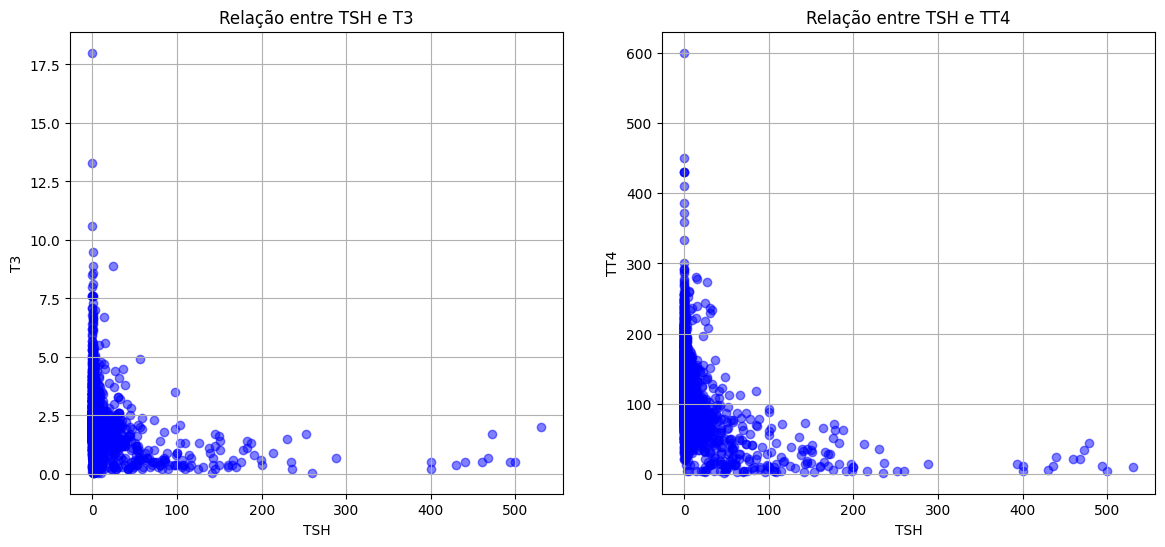

In [116]:
TSH = data['TSH']
T3 = data['T3']
TT4 = data['TT4']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(TSH, T3, color='blue', alpha=0.5)
axs[0].set_title('Relação entre TSH e T3')
axs[0].set_xlabel('TSH')
axs[0].set_ylabel('T3')
axs[0].grid(True)

axs[1].scatter(TSH, TT4, color='blue', alpha=0.5)
axs[1].set_title('Relação entre TSH e TT4')
axs[1].set_xlabel('TSH')
axs[1].set_ylabel('TT4')
axs[1].grid(True)

plt.show()

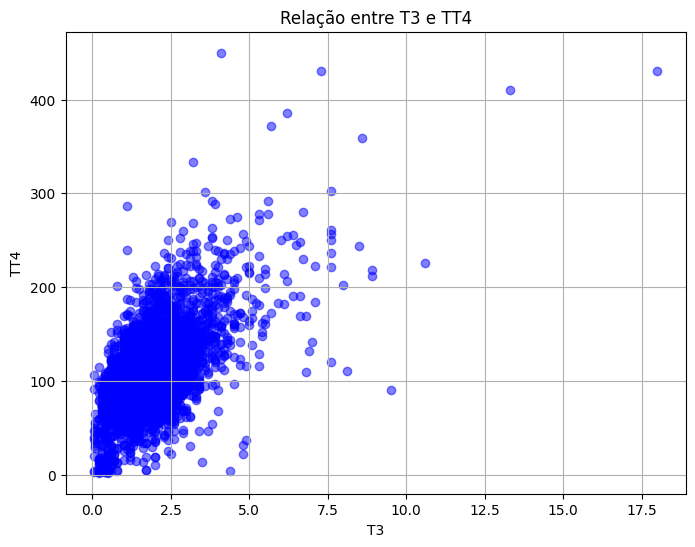

In [115]:
T3 = data['T3']
TT4 = data['TT4']

plt.figure(figsize=(8, 6))
plt.scatter(T3, TT4, color='blue', alpha=0.5)
plt.title('Relação entre T3 e TT4')
plt.xlabel('T3')
plt.ylabel('TT4')
plt.grid(True)
plt.show()